In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pmdarima.arima import auto_arima
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [14]:
data = pd.DataFrame(pd.read_csv('spc_data.csv')['|V| Sadie 1'])
data.columns = ['data']


In [15]:
from pmdarima.arima import ADFTest
atest = ADFTest(alpha = 0.05)
atest.should_diff(df)

(0.24711497578206557, True)

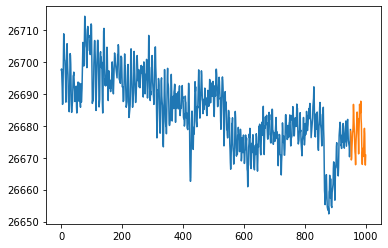

In [16]:
c = 950
train = data[:c]
test = data[c:]
plt.plot(train)
plt.plot(test)

      data
0  26697.5
1  26697.8
2  26694.9
3  26692.0
4  26686.7


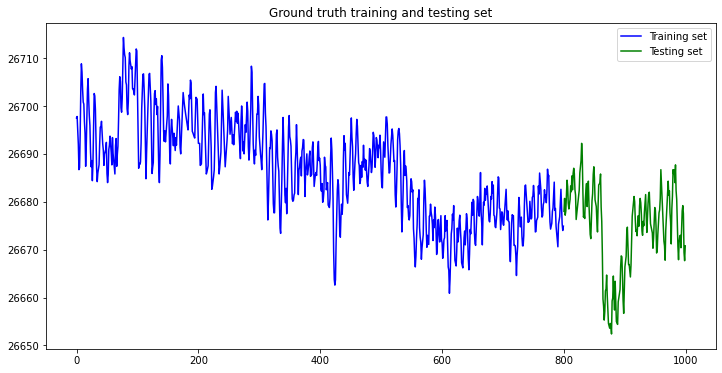

C:\Users\oscar\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ValueError: could not convert string to float: 'data'

In [28]:
# figure parameters
rcParams['figure.figsize'] = 12, 6
size = 200
# read data
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
print(data.head())
ts = data['data']
residual = data


# create training and test set
size = int(len(residual) * 0.8)
train, test = residual[0:size], residual[size:len(residual)]
plt.plot(train.index, train, color='blue', label='Training set')
plt.plot(test.index, test, color='green', label='Testing set')
plt.legend()
plt.title('Ground truth training and testing set')
plt.show()


# assess quality of ARIMA models
# for iterative one-step forecasting on test data set
def compare_ARIMA_modes_testing(order):
    history = [x for x in train]
    predictions_f = list()
    predictions_p = list()
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit(disp=-1)
        yhat_f = model_fit.forecast()[0][0]
        yhat_p = model_fit.predict(start=len(history), end=len(history))[0]
        predictions_f.append(yhat_f)
        predictions_p.append(yhat_p)
        history.append(test[t])
    error_f = mean_squared_error(test, predictions_f)
    error_p = mean_squared_error(test, predictions_p)
    print('MSE forecast:\t\t\t{:1.4f}'.format(error_f))
    print('MSE predict:\t\t\t{:1.4f}'.format(error_p))
    return {'Predictions forecast': predictions_f,
            'Predictions predict': predictions_p,
            'MSE forecast': error_f,
            'MSE predict': error_p}

ar_testing = compare_ARIMA_modes_testing((1, 0, 0))
ma_testing = compare_ARIMA_modes_testing((0, 1, 0))
ig_testing = compare_ARIMA_modes_testing((0, 0, 1))
arma_testing = compare_ARIMA_modes_testing((1, 1, 0))
igma_testing = compare_ARIMA_modes_testing((0, 1, 1))
arig_testing = compare_ARIMA_modes_testing((1, 0, 1))
arima_testing = compare_ARIMA_modes_testing((1, 1, 1))

# forecast and predict are identical for AR
plt.plot(test, label='Ground Truth')
plt.plot(ar_testing['Predictions forecast'], color='red', label='.forecast()')
plt.plot(ar_testing['Predictions predict'], color='green', label='.predict()')
plt.legend()
plt.title('AR')
plt.show()

# forecast and predict are different for MA
plt.plot(test, label='Ground Truth')
plt.plot(arma_testing['Predictions forecast'], color='red', label='.forecast()')
plt.plot(arma_testing['Predictions predict'], color='green', label='.predict()')
plt.legend()
plt.title('ARMA')
plt.show()


# compare forecasting results of ARIMA models
# for iterative forecasting
def compare_ARIMA_modes(order):
    history_f = [x for x in train]
    history_p = [x for x in train]
    predictions_f = list()
    predictions_p = list()
    for t in range(len(test)):
        model_f = ARIMA(history_f, order=order)
        model_p = ARIMA(history_p, order=order)
        model_fit_f = model_f.fit(disp=-1)
        model_fit_p = model_p.fit(disp=-1)
        yhat_f = model_fit_f.forecast()[0][0]
        yhat_p = model_fit_p.predict(start=len(history_p), end=len(history_p))[0]
        predictions_f.append(yhat_f)
        predictions_p.append(yhat_p)
        history_f.append(yhat_f)
        history_f.append(yhat_p)
    error_f = mean_squared_error(test, predictions_f)
    error_p = mean_squared_error(test, predictions_p)
    print('MSE forecast:\t\t\t{:1.4f}'.format(error_f))
    print('MSE predict:\t\t\t{:1.4f}'.format(error_p))
    """"""

ar = compare_ARIMA_modes((1, 0, 0))
ma = compare_ARIMA_modes((0, 1, 0))
ig = compare_ARIMA_modes((0, 0, 1))
arma = compare_ARIMA_modes((1, 1, 0))
igma = compare_ARIMA_modes((0, 1, 1))
arig = compare_ARIMA_modes((1, 0, 1))
arima = compare_ARIMA_modes((1, 1, 1))

# forecast and predict are different for AR
plt.plot(test, label='Ground Truth')
plt.plot(ar['Predictions forecast'], color='red', label='.forecast()')
plt.plot(ar['Predictions predict'], color='green', label='.predict()')
plt.legend()
plt.title('AR')
plt.show()

# forecast and predict are different for ARMA
plt.plot(test, label='Ground Truth')
plt.plot(arma['Predictions forecast'], color='red', label='.forecast()')
plt.plot(arma['Predictions predict'], color='green', label='.predict()')
plt.legend()
plt.title('ARMA')
plt.show()



# compare forecasting results of ARIMA models
# using the step parameter
def compare_ARIMA_modes_steps(order):
    history = [x for x in train]
    model = ARIMA(history, order=order)
    model_fit = model.fit(disp=-1)
    predictions_f_ms = model_fit.forecast(steps=len(test))[0]
    predictions_p_ms = model_fit.predict(start=len(history), end=len(history)+len(test)-1)
    error_f_ms = mean_squared_error(test, predictions_f_ms)
    error_p_ms = mean_squared_error(test, predictions_p_ms)
    print('MSE forecast:\t\t\t{:1.4f}'.format(error_f_ms))
    print('MSE predict:\t\t\t{:1.4f}'.format(error_p_ms))
    return {'Predictions forecast': predictions_f_ms,
            'Predictions predict': predictions_p_ms,
            'MSE forecast': error_f_ms,
            'MSE predict': error_p_ms}

ar_steps = compare_ARIMA_modes_steps((1, 0, 0))
ma_steps = compare_ARIMA_modes_steps((0, 1, 0))
ig_steps = compare_ARIMA_modes_steps((0, 0, 1))
arma_steps = compare_ARIMA_modes_steps((1, 1, 0))
igma_steps = compare_ARIMA_modes_steps((0, 1, 1))
arig_steps = compare_ARIMA_modes_steps((1, 0, 1))
arima_steps = compare_ARIMA_modes_steps((1, 1, 1))

# forecast and predict are identical for AR
plt.plot(test, label='Ground Truth')
plt.plot(ar_steps['Predictions forecast'], color='red', label='.forecast(steps)')
plt.plot(ar_steps['Predictions predict'], color='green', label='.predict(steps)')
plt.legend()
plt.title('AR')
plt.show()

# forecast and predict are different for ARMA
plt.plot(test, label='Ground Truth')
plt.plot(arma_steps['Predictions forecast'],  color='red', label='.forecast(steps)')
plt.plot(arma_steps['Predictions predict'], color='green', label='.predict(steps)')
plt.legend()
plt.title('ARMA')
plt.show()

In [24]:

"""
arima_model = auto_arima(train,start_p=0,d=1,start_q=0,
                        max_p=5,max_d=5,max_q=5,start_P=0,
                         D=1,start_Q=0,max_P=5,max_D=5,
                         max_Q=5,m=12,seasonal=True,
                         error_action='warn',trace=True,
                         supress_warnings=True,stepwise=True,
                         random_state=20,n_fits=50)"""
                    

"\narima_model = auto_arima(train,start_p=0,d=1,start_q=0,\n                        max_p=5,max_d=5,max_q=5,start_P=0,\n                         D=1,start_Q=0,max_P=5,max_D=5,\n                         max_Q=5,m=12,seasonal=True,\n                         error_action='warn',trace=True,\n                         supress_warnings=True,stepwise=True,\n                         random_state=20,n_fits=50)"

In [6]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 1000-c), index=test.index)
prediction.columns = ['predicted_sales']
prediction.head()

,predicted_sales
950,26678.414344
951,26678.651946
952,26676.737464
953,26675.443332
954,26674.136973


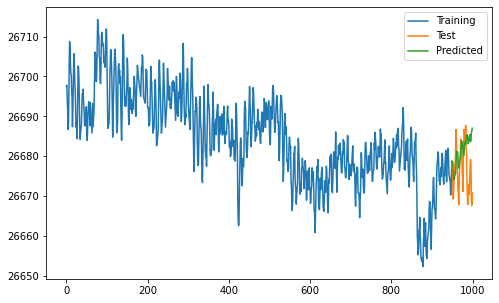

In [7]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend()
plt.show()

In [ ]:
chunk_size = 50
ints = 
for i in range(0, len(ints), chunk_size):
    chunk = ints[i:i+chunk_size

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

test = pd.date_range(start='16:00', end = '17:05', freq = 'S')
dft = pd.DataFrame(test, columns=['date'])
                            #Mu,    STD, dataPoints
dft['data'] = np.random.normal(2600, 200, len(test))

dft = dft.set_index('date')

In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 1000-c), index=test.index)
prediction.columns = ['predicted_sales']
prediction.head()

In [33]:
chunk_size = 50
#for i in range(0,len(dft),chunk_size):
    #pred = pd.DataFrame(arima_model.predict(n_periods = 50), index=test.index)
    #pred.columns = ['predicted_sales']
    #chunk = dft[i:i+chunk_size]
    #print(chunk)

      data
0  26697.5
1  26697.8
2  26694.9
3  26692.0
4  26686.7


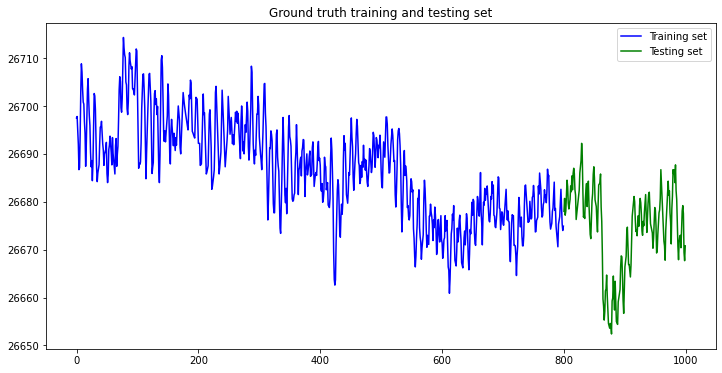

C:\Users\oscar\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ValueError: could not convert string to float: 'data'

In [36]:
# figure parameters
rcParams['figure.figsize'] = 12, 6
size = 200
# read data
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
print(data.head())
ts = data['data']
residual = data


# create training and test set
size = int(len(residual) * 0.8)
train, test = residual[0:size], residual[size:len(residual)]
plt.plot(train.index, train, color='blue', label='Training set')
plt.plot(test.index, test, color='green', label='Testing set')
plt.legend()
plt.title('Ground truth training and testing set')
plt.show()

# using the step parameter
def compare_ARIMA_modes_steps(order):
    history = [x for x in train]
    model = ARIMA(history, order=order)
    model_fit = model.fit(disp=-1)
    predictions_f_ms = model_fit.forecast(steps=len(test))[0]
    predictions_p_ms = model_fit.predict(start=len(history), end=len(history)+len(test)-1)
    error_f_ms = mean_squared_error(test, predictions_f_ms)
    error_p_ms = mean_squared_error(test, predictions_p_ms)
    print('MSE forecast:\t\t\t{:1.4f}'.format(error_f_ms))
    print('MSE predict:\t\t\t{:1.4f}'.format(error_p_ms))
    return {'Predictions forecast': predictions_f_ms,
            'Predictions predict': predictions_p_ms,
            'MSE forecast': error_f_ms,
            'MSE predict': error_p_ms}

ar_steps = compare_ARIMA_modes_steps((1, 0, 0))


In [73]:
#https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-an-arima-model-2e3b3080bd70
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

df = pd.DataFrame(pd.read_csv('spc_data.csv')['|V| Sadie 1'])
df.columns = ['data']
"""
plt.figure()
lag_plot(df['data'], lag=3)
plt.title('TESLA Stock - Autocorrelation plot with lag = 3')
plt.show()"""

"""
plt.plot(df["data"])
plt.title("PMU Data")
plt.xlabel("time")
plt.ylabel("price")
plt.show()
"""
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['data'].values
test_data = test_data['data'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
model = ARIMA(history, order = (4,1,0))


chunk_size = 50
#for i in range(0,len(dft),chunk_size):
    #pred = pd.DataFrame(arima_model.predict(n_periods = 50), index=test.index)
    #pred.columns = ['predicted_sales']
    #chunk = dft[i:i+chunk_size]
    #print(chunk)
chunk_size = 50 
for time_point in range(0,N_test_observations,chunk_size):
    #history = history[-400:]
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast(steps = 50)
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point:time_point+50]
    history =history+list(true_test_value)

C:\Users\oscar\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
C:\Users\oscar\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

 

In [74]:
MSE_error = mean_squared_error(test_data, list(np.concatenate(model_predictions)))
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 118.93080979566754


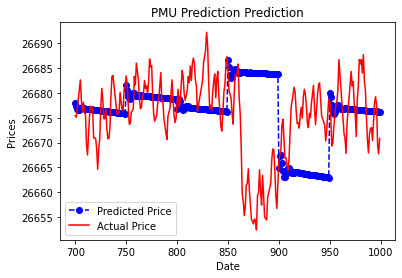

In [75]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, list(np.concatenate(model_predictions)), color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('PMU Prediction Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [47]:
len(test_data)

300

In [65]:
list(np.concatenate(model_predictions))

[26678.03010597023,
 26677.358256178475,
 26676.784245403476,
 26676.55160520703,
 26676.534351650193,
 26676.761055692266,
 26676.972756244337,
 26677.061005135696,
 26677.01443573954,
 26676.88019967431,
 26676.748668971755,
 26676.672829180294,
 26676.660715959333,
 26676.68549076804,
 26676.70891796368,
 26676.706623868686,
 26676.675363888753,
 26676.627961773196,
 26676.58148805413,
 26676.546878701014,
 26676.525354884387,
 26676.51094683066,
 26676.495945711344,
 26676.475482083555,
 26676.449113661976,
 26676.419606735653,
 26676.390449043178,
 26676.363803530225,
 26676.339821261063,
 26676.3172222125,
 26676.29442844196,
 26676.270480281237,
 26676.24533142203,
 26676.21957357327,
 26676.193920378377,
 26676.168797264152,
 26676.1442152422,
 26676.119901037582,
 26676.09553203142,
 26676.07091978456,
 26676.046063801277,
 26676.02109017966,
 26675.99614470488,
 26675.971310774057,
 26675.946586586928,
 26675.92191400697,
 26675.897227184814,
 26675.87248924394,
 26675.847701